<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/DS_Days/blob/November/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Covid-19 through Pandas, Matplotlib and Seaborn

The Coronavirus outbreak in 2020 can be considered one of the greatest challenges the world has faced in the last century. I have written this article on november 13 and the number of deaths is 1.297.347 in the whole world. In contrary of what many people think, Covid's proagnosis is not so terrible when compared to other deseases. Ebola outbreak in Western Africa in 2014 presented a fatality rate of around 70% in patients between 15 and 44 years old (Yes, only 3 in 10 patients could survive!). The problem about Covid-19 is how contagious it is. Differently from other deseases, such as Ebola that once you have it you need to be hospitalized, Covid-19 is a brief and mild desease for many people and some are even asymptomatics. This way, infected people can move around and infect many others. The desease has its origin in China and in a so globalized world it soon was present in every continent. I don't need to describe how serious this desease was ... I am sure everyone who is reading this article witnessed the caos Covid-19 brought to many countries. 
The Covid-19 outbreak is not the first pandemic the world has faced but it certainly is the first time we can overcome it through technology and of course data. Therefore, that's a great opportunity to analyze and have some insights from this desease. 
For this analysis, we are going to use three Python libraries: Pandas to manipulate the data, Matplotlib and Seaborn for vizualisation. This is a simple exploratory data analysis (EDA) but much can be done and you will see how easy to work with and powerful these libraries are.

Talk briefly about what I did in this EDA

## Data acquisition

The data present in this analysis was taken from the [ourworldindata.org](https://github.com/owid/covid-19-data/tree/master/public/data). The data is related to the whole world until november 17th. It is important to highlight that Covid-19 is new desease and it would be impossible to inform the axact number of Covid cases for example. No organiztion could do it. The main source of this data is the European Centre for Disease Prevention and Control (ECDC). This data is also collected from a variety of sources such as (United Nations, World Bank, Global Burden of Disease, Blavatnik School of Government, etc.). More information about the data source can be found [here.](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

## Variable dictionary

This dataset features 51 variables. You can have a detailed decription of these variables [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).



## Importing the dataset

As said before, the dataset used in this analysis is obtained at `ourworldindata.org`. You can download this data [here.](https://https://github.com/owid/covid-19-data/tree/master/public/data). Let's import the data from `csv` format into a variable `df`.   

In [1]:
#importing the dataset

import pandas as pd

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Exploratory data analysis 

In this section we are going to explore our dataset. Pandas library has some handy commands to make it. Let's do it!



In [2]:
# A very first look on the data

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
# How big is the dataset?

df.shape

print("This data set has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This data set has 57826 rows and 50 columns.


In [4]:
# The columns reprsent the variables of this dataset. Let's see what we have here.

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [5]:
# And let's see what kind of variables there are in the dataset.

df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

Well ... Now we have a better sense of how this dataset looks like ... We could figure out how big the dataset is (df.shape), the name of the variables (df.columns) and what kind of variables are present in the dataset (df.dtypes). By taking a look at the first 5 rows it was possible to see that there plenty of null values in aour dataset. And we are going to work on it now. Let's see the percentage of null values in our dataset.

In [6]:
# Knowing the percentage of null values in our dataset

df.isnull().sum()/df.shape[0]

iso_code                              0.005620
continent                             0.011241
location                              0.000000
date                                  0.000000
total_cases                           0.062913
new_cases                             0.016048
new_cases_smoothed                    0.030125
total_deaths                          0.225936
new_deaths                            0.016048
new_deaths_smoothed                   0.030125
total_cases_per_million               0.067911
new_cases_per_million                 0.017155
new_cases_smoothed_per_million        0.031249
total_deaths_per_million              0.230675
new_deaths_per_million                0.017155
new_deaths_smoothed_per_million       0.031249
reproduction_rate                     0.348113
icu_patients                          0.920036
icu_patients_per_million              0.920036
hosp_patients                         0.910144
hosp_patients_per_million             0.910144
weekly_icu_ad

The percentage of null values varies a lot in our dataset. Some variables, such as date and location, present no null value. On the other hand, information about hospitalization (icu_patients, weekly_icu_admissions, etc) is almost non existent, featuring more than 90% of null values. Let's see the ten variables that present null values the most and the least.  

In [7]:
# Checking the varibles that present null values the most

(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)[0:11]

weekly_icu_admissions_per_million     0.993152
weekly_icu_admissions                 0.993152
weekly_hosp_admissions                0.987964
weekly_hosp_admissions_per_million    0.987964
icu_patients                          0.920036
icu_patients_per_million              0.920036
hosp_patients_per_million             0.910144
hosp_patients                         0.910144
new_tests                             0.619081
new_tests_per_thousand                0.619081
total_tests                           0.615139
dtype: float64

In [8]:
#Checking the variables that present null values the least

(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)[0:11]

location                  0.000000
date                      0.000000
iso_code                  0.005620
population                0.005620
continent                 0.011241
new_cases                 0.016048
new_deaths                0.016048
new_deaths_per_million    0.017155
new_cases_per_million     0.017155
life_expectancy           0.018435
new_deaths_smoothed       0.030125
dtype: float64

More detailed information is missed but very important information such as `new_cases` and `new_deaths` are almost complete and and therefore much can be analyzed in this data.

One important thing to do is to set the date in the dataset to datetime format so that we can manipulate date through dates ... Let's convert the date into this format.

In [9]:
# Converting the date into datetime format

df["date"] = pd.to_datetime(df.date)

So far we have only had a first impression of the dataset. Finally, we are going to explore and extract information about the COVID-19 outbreak. Let's use the Pandas library to know what are the countries that present higher numbers of deaths and Covid cases. 

In [10]:
# Finding the 5 countries with the highest number of deaths 

df.loc[df.date == "2020-11-18"].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54641,USA,North America,United States,2020-11-18,11359802.0,154316.0,157425.143,248687.0,1467.0,1286.286,34319.369,466.208,475.601,751.314,4.432,3.886,NaN,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
7708,BRA,South America,Brazil,2020-11-18,5911758.0,35294.0,30244.857,166699.0,685.0,552.857,27812.262,166.043,142.289,784.247,3.223,2.601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
24506,IND,Asia,India,2020-11-18,8912907.0,38617.0,39556.571,130993.0,474.0,488.857,6458.608,27.983,28.664,94.922,0.343,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
34304,MEX,North America,Mexico,2020-11-18,1011153.0,1757.0,4660.286,99026.0,165.0,454.857,7842.484,13.627,36.145,768.044,1.280,3.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
54316,GBR,Europe,United Kingdom,2020-11-18,1410732.0,20051.0,25279.571,52745.0,598.0,425.000,20780.896,295.363,372.383,776.964,8.809,6.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [11]:
# Finding the 5 countries with the highest number of Covid-19 cases

df.loc[df.date == "2020-11-18"].sort_values(by="total_cases", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54641,USA,North America,United States,2020-11-18,11359802.0,154316.0,157425.143,248687.0,1467.0,1286.286,34319.369,466.208,475.601,751.314,4.432,3.886,NaN,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
24506,IND,Asia,India,2020-11-18,8912907.0,38617.0,39556.571,130993.0,474.0,488.857,6458.608,27.983,28.664,94.922,0.343,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7708,BRA,South America,Brazil,2020-11-18,5911758.0,35294.0,30244.857,166699.0,685.0,552.857,27812.262,166.043,142.289,784.247,3.223,2.601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
18819,FRA,Europe,France,2020-11-18,2036755.0,45522.0,29585.143,46273.0,1219.0,580.857,31203.392,697.404,453.249,708.909,18.675,8.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
43230,RUS,Europe,Russia,2020-11-18,1991998.0,20985.0,24984.143,34387.0,456.0,460.857,13649.949,143.797,171.201,235.633,3.125,3.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816


That's a good first approach to know more about the Covid-19 scenario in the world. However, there is a better way to display this information. Let's plot it! To do so, let's use `Matplotlib` library. Let's first plot a histogram of the total number of cases and deaths.

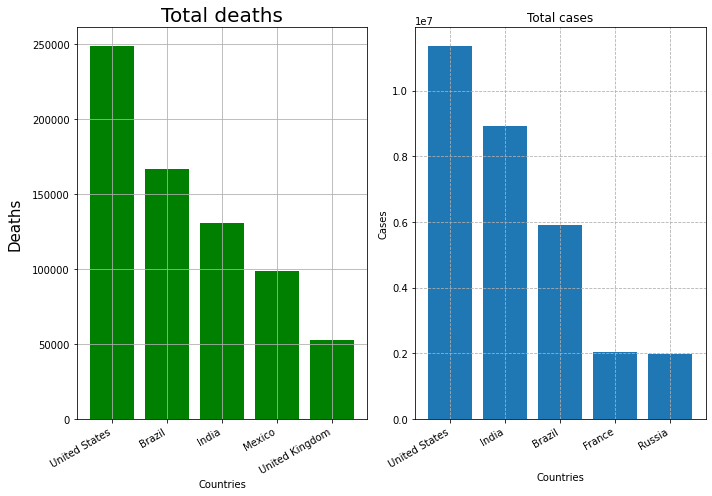

In [37]:
# importing Matplotlib

import matplotlib.pyplot as plt

# creating a graph of total number of cases

top5_total_deaths = df.loc[df.date == "2020-11-18", ["location", "total_deaths"]].sort_values(by="total_deaths", ascending=False)[1:6]
top5_total_cases = df.loc[df.date == "2020-11-18", ["location", "total_cases"]].sort_values(by="total_cases", ascending=False)[1:6]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
ax1.bar(x="location", height="total_deaths", data = top5_total_deaths, facecolor="g")
ax1.set_title("Total deaths", fontsize = 20)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Deaths", fontsize=15, labelpad=10, )
ax1.grid()


ax2.bar(x="location", height="total_cases", data = top5_total_cases)
ax2.set_title("Total cases")
ax2.set_xlabel("Countries")
ax2.set_ylabel("Cases")
ax2.grid(ls="--")


fig.autofmt_xdate()

plt.tight_layout()
